In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('1716.csv')

In [3]:
data.head()

,vin,fleet,positionid,vehicleid,gtpdriverid,version,heading,latitude,longitude,altitude,...,total_engine_hours,total_distance,time_sweetspot,time_idle,time_pto,time_drive,speed,msg_trigger_type,current_fuel_level,received_date
0,MC2M7SRC0HK051716,Syndicate_Carrier,1249366856,12275,NaN,0,0,17.378147,78.488674,495,...,4581.90,152410.62,2066.85,587.04,0.04,3993.9,0,PERIODIC,40.000000,10:57.4
1,MC2M7SRC0HK051716,Syndicate_Carrier,1249366857,12275,NaN,0,0,17.378147,78.488674,495,...,4581.90,152410.62,2066.85,587.04,0.04,3993.9,0,IGNITION_ON,40.000000,10:57.4
2,MC2M7SRC0HK051716,Syndicate_Carrier,1249370117,12275,NaN,0,0,17.378084,78.488539,496,...,4581.95,152410.63,2066.85,587.12,0.04,3993.9,0,PERIODIC,40.400002,15:16.2
3,MC2M7SRC0HK051716,Syndicate_Carrier,1249374047,12275,NaN,0,0,17.378076,78.488542,494,...,4582.05,152410.63,2066.85,587.20,0.04,3993.9,0,PERIODIC,40.400002,20:16.3
4,MC2M7SRC0HK051716,Syndicate_Carrier,1249378224,12275,NaN,0,0,17.378079,78.488545,494,...,4582.15,152410.63,2066.85,587.28,0.04,3993.9,0,PERIODIC,40.400002,25:15.9


In [4]:
df = data[data['time_idle'] > 120] 

In [5]:
data1=df[['latitude','longitude','time_idle']]

In [6]:
data1.head()

,latitude,longitude,time_idle
0,17.378147,78.488674,587.04
1,17.378147,78.488674,587.04
2,17.378084,78.488539,587.12
3,17.378076,78.488542,587.20
4,17.378079,78.488545,587.28


In [7]:
data1.describe()

,latitude,longitude,time_idle
count,14432.000000,14432.000000,14432.000000
mean,23.079724,76.166273,607.357057
std,3.927560,1.333852,12.422307
min,17.320653,73.846541,587.040000
25%,19.420721,75.021918,595.980000
50%,22.474846,76.081952,606.910000
75%,26.857145,77.145657,618.282500
max,28.938884,79.571790,630.160000


In [8]:
x = data1.iloc[:,2:3]

In [9]:
x

,time_idle
0,587.04
1,587.04
2,587.12
3,587.20
4,587.28
5,587.37
6,587.44
7,587.53
8,587.55
9,587.55


In [10]:
kmeans = KMeans(4)

In [11]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 2, ..., 1, 1, 1])

In [13]:
data_with_clusters = data1.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,latitude,longitude,time_idle,Cluster
0,17.378147,78.488674,587.04,2
1,17.378147,78.488674,587.04,2
2,17.378084,78.488539,587.12,2
3,17.378076,78.488542,587.20,2
4,17.378079,78.488545,587.28,2
5,17.378078,78.488561,587.37,2
6,17.377852,78.488458,587.44,2
7,17.377855,78.488462,587.53,2
8,17.377885,78.488467,587.55,2
9,17.377941,78.488458,587.55,2


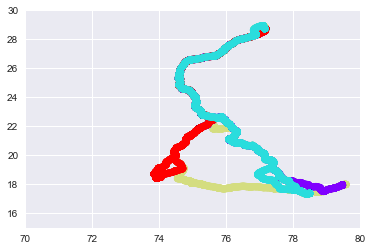

In [14]:
plt.scatter(data_with_clusters['longitude'],data_with_clusters['latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(70,80)
plt.ylim(15,30)
plt.show()